In [1]:
from eda_imports import *

In [2]:
data_dir = '/projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1'
c2g_bam_file = f'{data_dir}/tasrkleat-results/align_contigs2genome/cba.sorted.bam'
r2c_bam_file = f'{data_dir}/tasrkleat-results/align_reads2contigs/cba.sorted.bam'

In [3]:
adf = pd.read_csv('../test-on-114genes-UHRC1.tsv', keep_default_na=False, sep='\t')

In [18]:
adf.shape

(47217, 31)

In [4]:
adf.query('evidence_type == "suffix"').sort_values('max_contig_len', ascending=False).head(10)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
7777,chr1,-,120454677,120454176,NOTCH2,ENSG00000134250,501,suffix,A0.J101054@9|A1.R26187@9,10914,40,False,2,0,0,0,2,5,0,0,9,0,9,AATAAA,16,120454700,23,AATAAA,16,120454700,23
45744,chr9,-,139388895,139388896,NOTCH1,ENSG00000148400,-1,suffix,A0.R100807@5,9513,40,False,1,0,0,0,1,1,0,0,5,0,5,AATAAA,16,139388917,22,AATAAA,16,139388917,22
33948,chr3,-,47057925,47057925,SETD2,ENSG00000181555,0,suffix,A0.J100728@8|A0.R100773@8,8517,40,False,2,0,0,0,2,3,0,0,8,0,8,AATAAA,16,47057943,18,AATAAA,16,47057943,18
16583,chr14,-,95555537,95555001,DICER1,ENSG00000100697,536,suffix,A0.J100670@1|A0.R100891@1,7195,40,False,2,0,0,0,2,0,0,0,0,0,1,GATAAA,11,95555585,48,GATAAA,11,95555585,48
35159,chr4,+,55164411,55164414,PDGFRA,ENSG00000134853,-3,suffix,A0.R100995@6477|A0.S61654@63,6488,40,False,2,0,0,0,2,4,0,0,10,0,10,AATAAA,16,55164386,25,AATAAA,16,55164386,25
44667,chr9,+,133763061,133763062,ABL1,ENSG00000097007,-1,suffix,A0.R100713@5479|A1.S26142@6234,6244,40,False,2,0,0,0,2,2,0,0,9,0,9,AATAAA,16,133763038,23,AATAAA,16,133763038,23
23910,chr19,+,11172952,11172953,SMARCA4,ENSG00000127616,-1,suffix,A0.J100737@483|A0.R100671@5509|A1.S26663@1234,5524,40,False,3,0,0,0,3,10,0,0,14,0,14,AATAAA,16,11172926,26,AATAAA,16,11172926,26
18183,chr16,+,2138712,2138712,TSC2,ENSG00000103197,0,suffix,A1.J26216@5429|A1.R26177@5426|A1.S26341@1697,5442,40,False,3,0,0,0,3,3,0,0,12,0,12,AATAAA,16,2138667,45,AATAAA,16,2138667,45
22342,chr17,-,56431036,56431037,RNF43,ENSG00000108375,-1,suffix,A0.R100969@7|A0.S100981@7|A1.S26410@7,4867,40,False,3,0,0,0,3,2,0,0,7,0,7,AATATA,10,56431053,17,AATATA,10,56431053,17
18864,chr16,+,68869443,68869451,CDH1,ENSG00000039068,-8,suffix,A0.R100743@4841,4850,40,False,1,0,0,0,1,2,0,0,8,0,8,ATTAAA,15,68869421,22,ATTAAA,15,68869421,22


(0, 60)

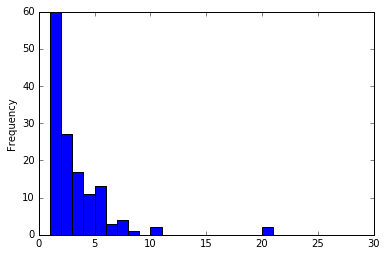

In [17]:
ax = adf.query('num_suffix_reads > 0').num_suffix_reads.plot.hist(bins=np.arange(0, 30, 1))
ax.set_ylim(0, 60)

In [9]:
df_kleat2 = pd.read_csv('/projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/kleat/cba.KLEAT', sep='\t')
df_kleat2.head(2)

,gene,transcript,transcript_strand,coding,contig,chromosome,cleavage_site,within_UTR,distance_from_annotated_site,ESTs,length_of_tail_in_contig,number_of_tail_reads,number_of_bridge_reads,max_bridge_read_tail_length,bridge_read_identities,tail+bridge_reads,number_of_link_pairs,max_link_pair_length,link_pair_identities,hexamer_loc+id,3UTR_start_end,flag
0,RTCA,ENST00000370126,+,yes,A0.S52623,chr1,100732571,yes,86,-,0,0,0,0,-,0,0,0,-,-,-,2
1,RTCA,ENST00000483474,+,no,A0.J100697,chr1,100739000,yes,8,-,0,0,0,0,-,0,0,0,-,-,-,2


(0, 60)

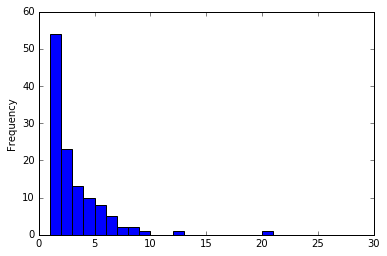

In [16]:
ax = df_kleat2.query('number_of_tail_reads > 0').number_of_tail_reads.plot.hist(bins=np.arange(0, 30, 1))
ax.set_ylim(0, 60)

In [21]:
adf[adf.max_suffix_read_tail_len != adf.max_suffix_contig_tail_len]\
    .query('max_suffix_contig_tail_len > 1')\
    .query('max_suffix_read_tail_len > 0').head()

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
8506,chr1,-,204525925,204531540,RNA5SP74,ENSG00000200408,-5615,suffix,A0.R103075@6|A0.S47199@4,76,40,False,2,0,0,0,2,1,0,0,5,0,6,TTTAAA,3,204525945,20,TTTAAA,3,204525945,20
9593,chr10,-,6132816,6113476,RP11-414H17.2,ENSG00000214015,19340,suffix,A0.R101981@28,80,4,False,1,0,0,0,1,1,0,0,23,0,28,ATTAAA,15,6132834,18,ATTAAA,15,6132834,18
20200,chr17,+,7572171,7561086,ATP1B2,ENSG00000129244,11085,suffix,A0.R100748@500,504,40,False,1,0,0,0,1,2,0,0,2,0,3,AAAAAG,7,7572148,23,AAAAAG,7,7572148,23
28592,chr2,-,99436278,99443437,KIAA1211L,ENSG00000196872,-7159,suffix,A0.R100626@9,232,0,False,1,0,0,0,1,2,0,0,2,0,9,NA,-1,-1,-1,NA,-1,-1,-1
35298,chr4,+,81812958,81794228,C4orf22,ENSG00000197826,18730,suffix,A1.S9156@33,56,0,False,1,0,0,0,1,1,0,0,20,0,22,AATAAA,16,81812940,18,AATAAA,16,81812952,6


In [22]:
run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t A0.R101981 -s chr10 -l 6132816 --plot-all-reads

2018-07-24 10:21:42,491|INFO|c2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_contigs2genome/cba.sorted.bam
2018-07-24 10:21:42,492|INFO|r2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_reads2contigs/cba.sorted.bam
0it [00:00, ?it/s]
2018-07-24 10:21:42,704|INFO|contig.query_name: A0.R101981
2018-07-24 10:21:42,705|INFO|contig.is_reverse: False
2018-07-24 10:21:42,708|INFO|contig.cigarstring: 28S22M30S
2018-07-24 10:21:42,709|INFO|contig.reference_start: 6132816
2018-07-24 10:21:42,709|INFO|contig.reference_end: 6132838
2018-07-24 10:21:43,067|INFO|collected 1 reads aligned to for A0.R101981 (use --plot-all-reads to plot all reads)


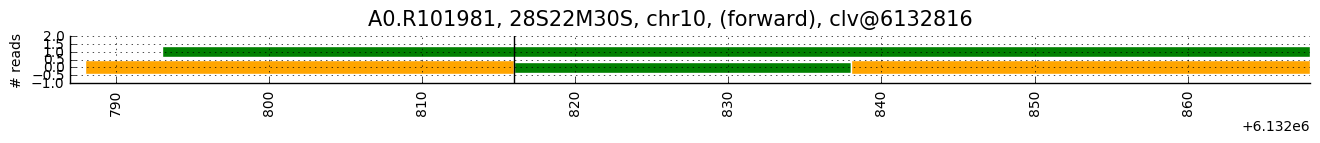

In [23]:
Image('./chr10_A0.R101981_6132816.png')

In [12]:
adf[adf.contig_ids_at_pos.str.contains('A0.R100743')]

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
18857,chr16,+,68868190,68867488,CDH1,ENSG00000039068,702,bridge,A0.R100743@3588,4850,40,False,0,1,0,0,1,0,2,0,0,2,0,NA,-1,-1,-1,NA,-1,-1,-1
18864,chr16,+,68869443,68869451,CDH1,ENSG00000039068,-8,suffix,A0.R100743@4841,4850,40,False,1,0,0,0,1,2,0,0,8,0,8,ATTAAA,15,68869421,22,ATTAAA,15,68869421,22


In [4]:
adf.query('evidence_type == "suffix"').sort_values('max_suffix_read_tail_len', ascending=False).head(5)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
195,chr1,+,1073784,1079437,RP11-465B22.5,ENSG00000223823,-5653,suffix,A0.S49790@30,32,0,False,1,0,0,0,1,0,0,0,0,0,1,NA,-1,-1,-1,NA,-1,-1,-1
32811,chr3,+,96763845,96728979,EPHA6,ENSG00000080224,34866,suffix,A0.S72554@66,36,0,True,1,0,0,0,1,0,0,0,0,0,7,GATAAA,11,96763814,31,GATAAA,11,96763814,31
33930,chr3,-,44970888,44970797,ZDHHC3,ENSG00000163812,91,suffix,A0.S41818@1,75,40,False,1,0,0,0,1,0,0,0,0,0,1,NA,-1,-1,-1,NA,-1,-1,-1
33908,chr3,-,41281477,41288089,ULK4,ENSG00000168038,-6612,suffix,A1.R26123@1|A1.S26619@1,461,40,False,2,0,0,0,2,0,0,0,0,0,1,AAAACA,2,41281515,38,AAAACA,2,41281515,38
33582,chr3,-,17876299,17913220,AC104297.1,ENSG00000213383,-36921,suffix,A0.S23746@1,74,40,False,1,0,0,0,1,0,0,0,0,0,1,AAAAAG,7,17876309,10,AAAAAG,7,17876307,8


In [8]:
run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t A0.R100743 -s chr16 -l 68869443 --plot-all-reads

2018-07-24 10:12:30,173|INFO|c2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_contigs2genome/cba.sorted.bam
2018-07-24 10:12:30,176|INFO|r2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_reads2contigs/cba.sorted.bam
0it [00:00, ?it/s]
2018-07-24 10:12:30,303|INFO|contig.query_name: A0.R100743
2018-07-24 10:12:30,304|INFO|contig.is_reverse: False
2018-07-24 10:12:30,307|INFO|contig.cigarstring: 198M833N115M63258N224M6530N144M125N156M1348N137M1342N184M275N129M1049N183M2019N245M3520N146M2575N225M1173N228M4547N131M1349N144M3492N671M1I1581M8S
2018-07-24 10:12:30,308|INFO|contig.reference_start: 68771168
2018-07-24 10:12:30,309|INFO|contig.reference_end: 68869444
2018-07-24 10:12:30,392|INFO|collected 36 reads aligned to for A0.R100743 (use --plot-all-reads to plot all reads)


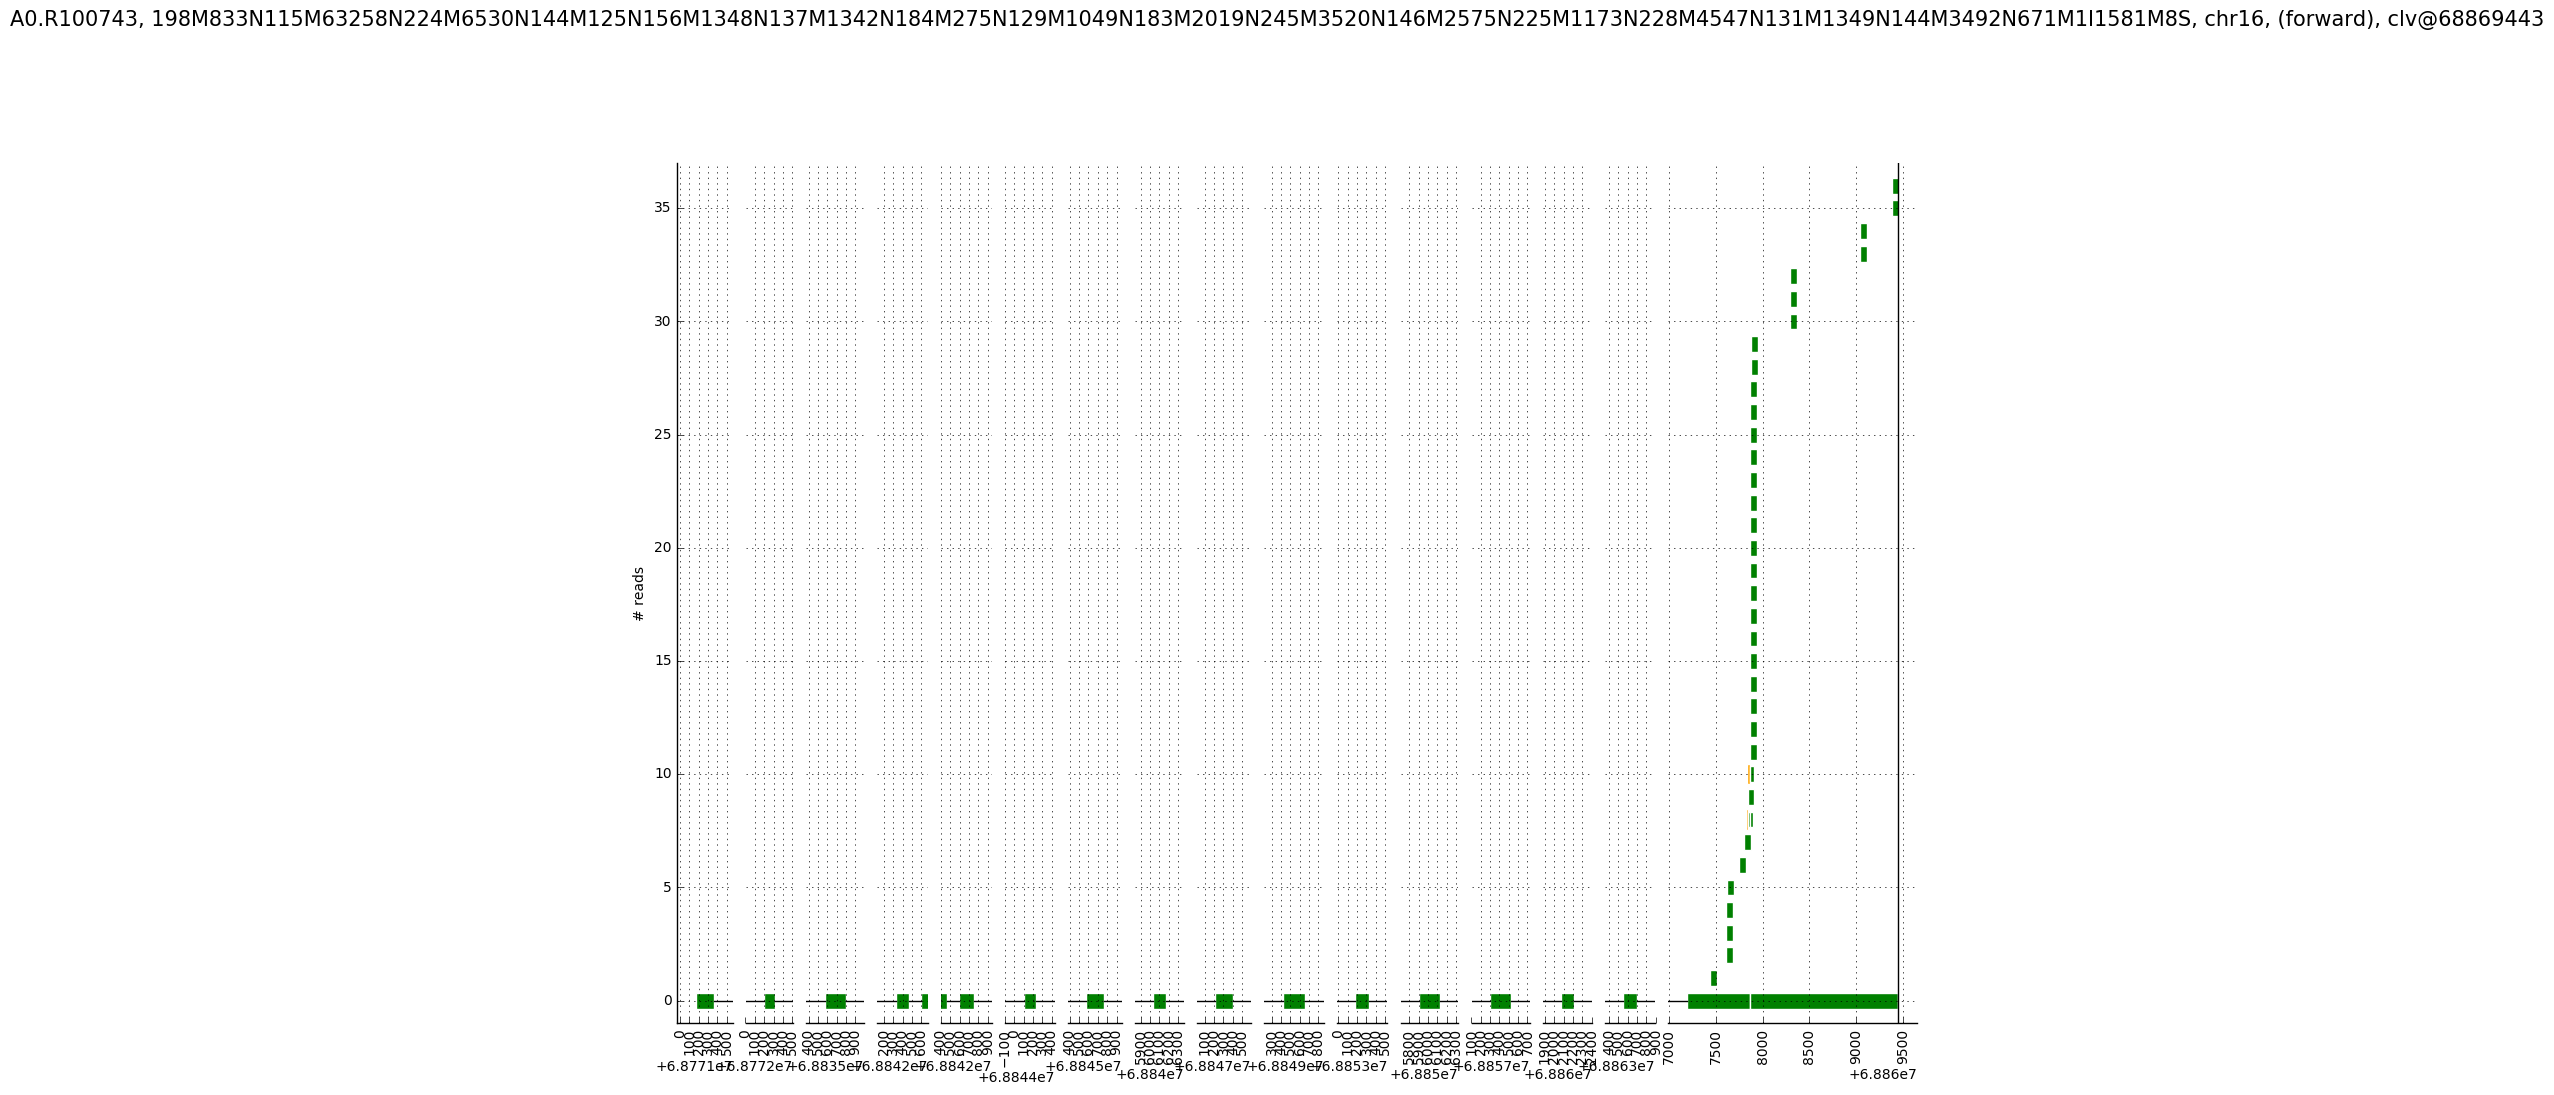

In [9]:
Image('./chr16_A0.R100743_68869443.png')

In [21]:
run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t A0.R100626 -s chr2 -l 99436278 --plot-all-reads --seqname-beg-end 99436268 99436288

2018-07-23 16:31:05,114|INFO|c2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_contigs2genome/cba.sorted.bam
2018-07-23 16:31:05,115|INFO|r2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_reads2contigs/cba.sorted.bam
0it [00:00, ?it/s]
2018-07-23 16:31:05,152|INFO|contig.query_name: A0.R100626
2018-07-23 16:31:05,152|INFO|contig.is_reverse: False
2018-07-23 16:31:05,154|INFO|contig.cigarstring: 9S223M
2018-07-23 16:31:05,154|INFO|contig.reference_start: 99436278
2018-07-23 16:31:05,155|INFO|contig.reference_end: 99436501
2018-07-23 16:31:05,203|INFO|collected 100 reads aligned to for A0.R100626 (use --plot-all-reads to plot all reads)


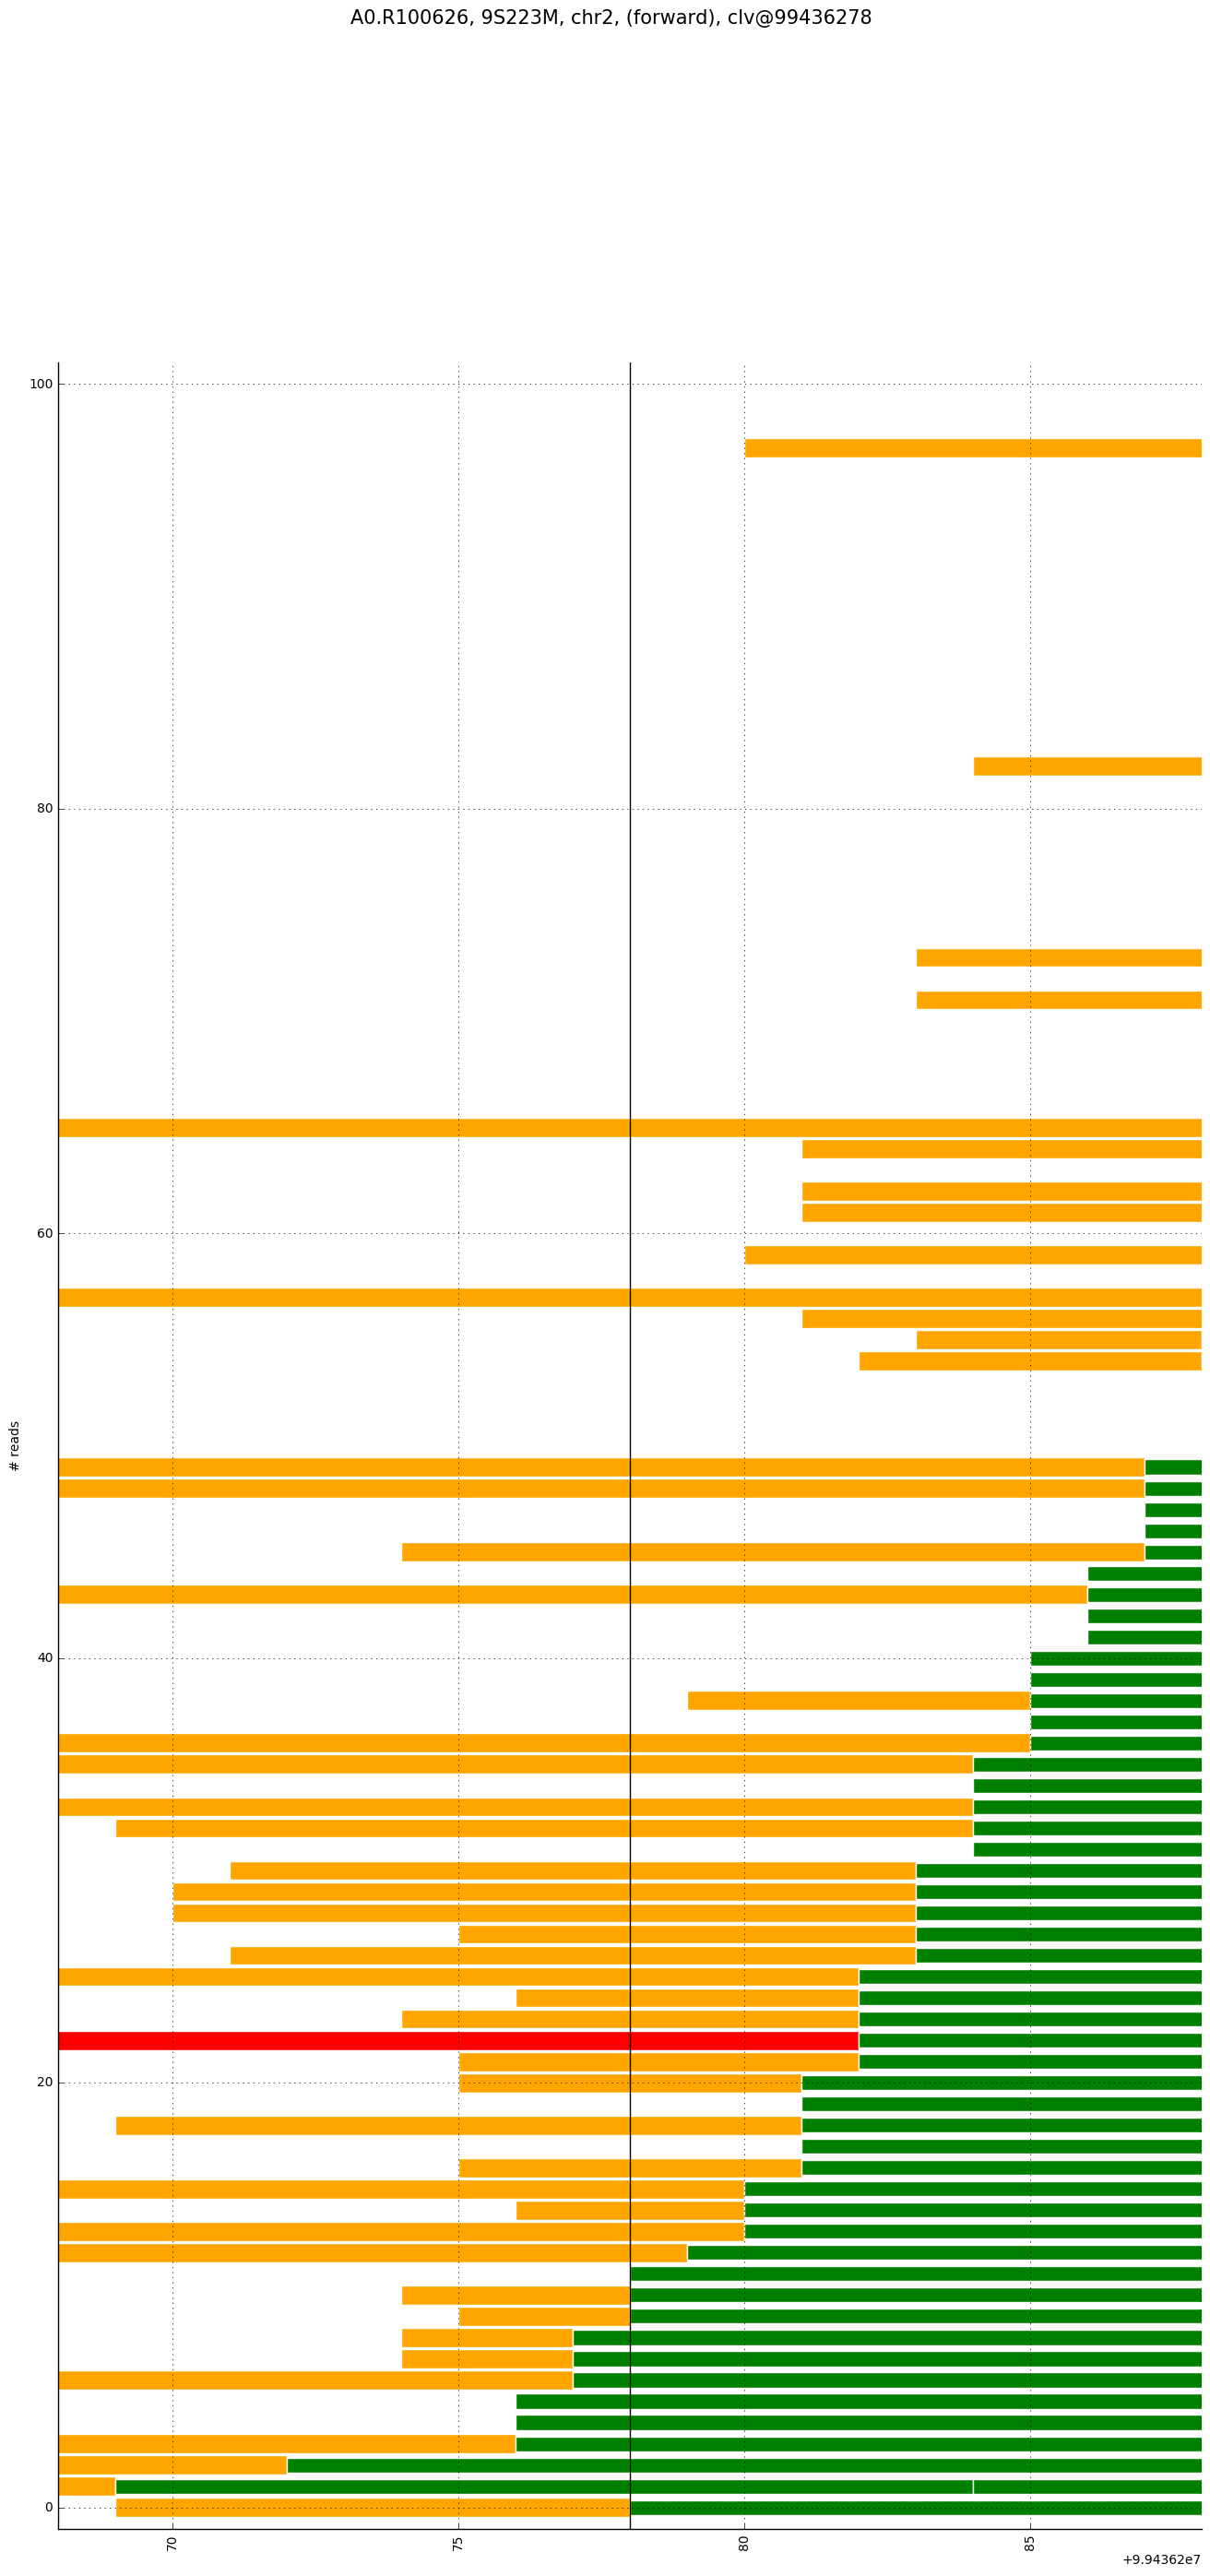

In [22]:
Image('./chr2_A0.R100626_99436278.png')

In [18]:
run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t A0.R100626 -s chr2 -l 99436278

2018-07-21 20:32:21,673|INFO|c2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_contigs2genome/cba.sorted.bam
2018-07-21 20:32:21,675|INFO|r2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_reads2contigs/cba.sorted.bam
0it [00:00, ?it/s]
2018-07-21 20:32:21,714|INFO|contig.query_name: A0.R100626
2018-07-21 20:32:21,715|INFO|contig.is_reverse: False
2018-07-21 20:32:21,716|INFO|contig.cigarstring: 9S223M
2018-07-21 20:32:21,717|INFO|contig.reference_start: 99436278
2018-07-21 20:32:21,718|INFO|contig.reference_end: 99436501
2018-07-21 20:32:21,771|INFO|collected 2 reads aligned to for A0.R100626 (use --plot-all-reads to plot all reads)


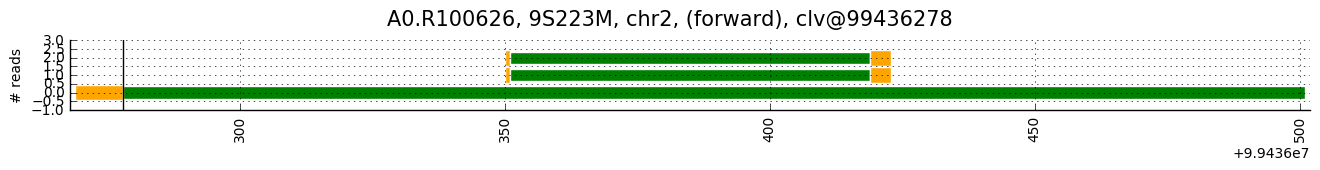

In [19]:
Image('./chr2_A0.R100626_99436278.png')